In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [1]:
df = pd.read_csv('../python_code/everything100percat_with_ai_flags.csv')


NameError: name 'pd' is not defined

Descriptive Statistics of Features:                        count          mean           std         min  \
p_t                  15832.0      0.022487      0.017872    0.000000   
lexical_spike_delta  15832.0      0.000328      0.017872   -0.022159   
perplexity           15832.0    513.777110    405.422744    0.000000   
burstiness           15832.0      0.666201      0.450737    0.000000   
mean_dep_depth       15832.0      3.612440      0.798653    0.000000   
clause_ratio         15832.0      0.844290      0.558929    0.000000   
voice_ratio          15832.0      0.989009      0.016739    0.000000   
fre                  15832.0     28.797081     19.939399 -226.728904   
fog                  15832.0     17.110452      4.805757    0.000000   
chars_per_sent       15832.0    193.880272    103.234973    0.000000   
sents_per_para       15832.0    137.503916    177.397141    0.000000   
nTTR                 15832.0      7.015387      0.825452    0.000000   
word_density         15832.0

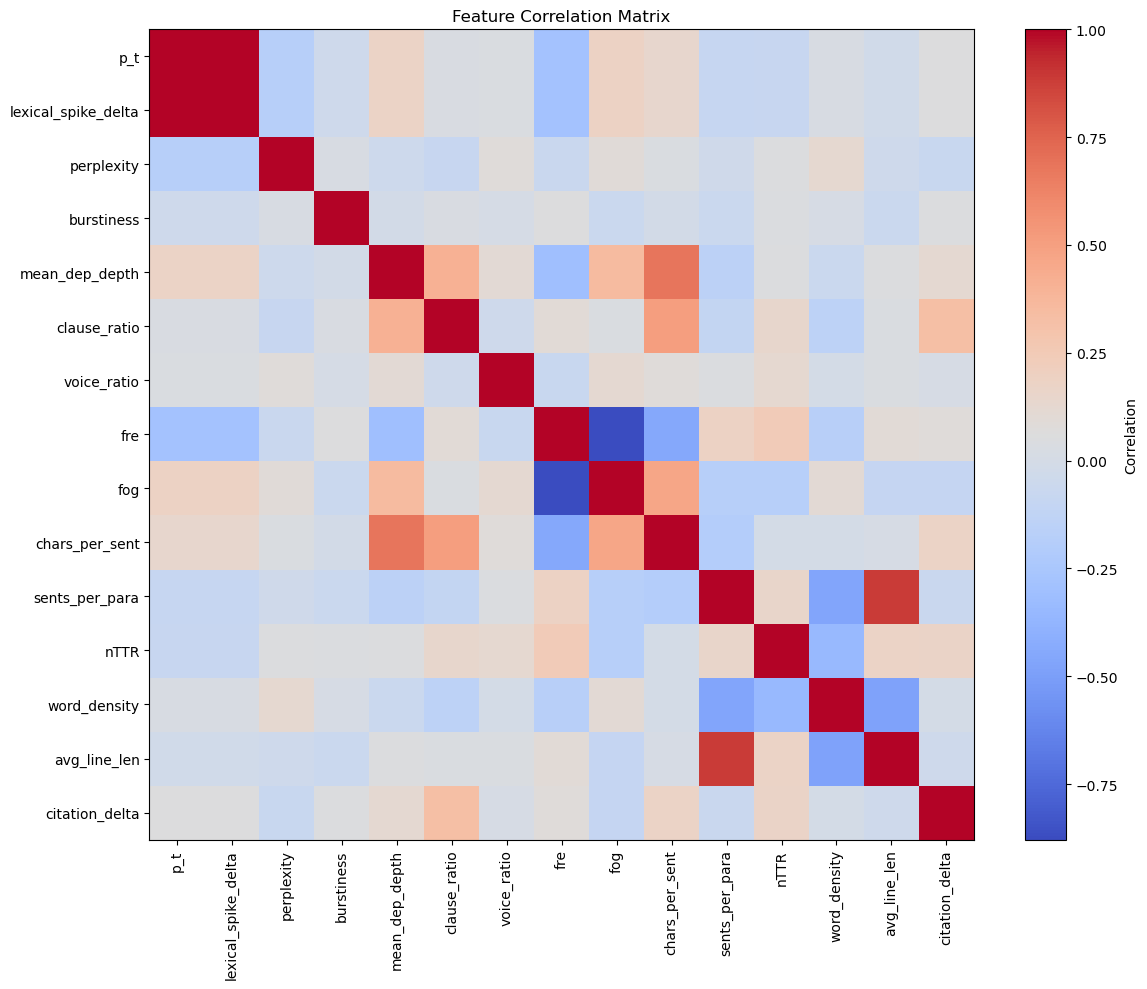

In [11]:
from sklearn.impute import SimpleImputer

# 2. Load the revision-level DataFrame (update path as needed)
df = pd.read_csv('../python_code/everything100percat_with_ai_flags.csv')

# 3. Identify numeric feature columns (excluding metadata/int identifiers)
meta_cols = ['Unnamed: 0', 'snapshot_ts', 'rev_id', 'timestamp', 'user',
             'is_bot', 'content', 'article_id', 'title', 'root', 'stratum', 'plain_text']
feature_cols = [c for c in df.columns if df[c].dtype in [np.float64, np.int64] and c not in meta_cols]

# 1. Descriptive statistics (impute for completeness)
imputer = SimpleImputer(strategy='median')
X_imp = imputer.fit_transform(df[feature_cols])
df_imp = pd.DataFrame(X_imp, columns=feature_cols)

desc_stats = df_imp.describe().T
print("Descriptive Statistics of Features:", desc_stats)

print(desc_stats)

# 5. Correlation heatmap of features
corr = df[feature_cols].corr()
plt.figure(figsize=(12, 10))
plt.imshow(corr, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Correlation')
plt.xticks(range(len(feature_cols)), feature_cols, rotation=90)
plt.yticks(range(len(feature_cols)), feature_cols)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()




In [20]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 1) Load data
df = pd.read_csv("everything100percat_with_ai_flags.csv")

# 2) Identify numeric feature columns only
#    This auto-selects int/float dtypes and drops any dict/object columns.
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# 3) Exclude any integer identifiers or target
exclude = [
    'Unnamed: 0','rev_id','article_id',    # identifiers
    'is_bot','ai_flag'                    # binary target / flag
]
feature_cols = [c for c in numeric_cols if c not in exclude]

# 4) Prepare X, y
X = df[feature_cols]
y = df['ai_flag'].astype(int)

# 5) Impute missing values (now only numeric!)
imputer = SimpleImputer(strategy='median')
X_imp = imputer.fit_transform(X)

# === CORRELATION APPROACH ===
corr_with_flag = pd.Series(
    np.corrcoef(X_imp.T, y, rowvar=True)[-1, :-1],
    index=feature_cols
).abs().sort_values(ascending=False)

print("Top 10 features by |corr| with ai_flag:")
print(corr_with_flag.head(10))

# === MODEL-BASED APPROACH ===

# 6a) Logistic Regression (standardized coefficients)
X_std = StandardScaler().fit_transform(X_imp)
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_std, y)
lr_coef = pd.Series(np.abs(lr.coef_[0]), index=feature_cols).sort_values(ascending=False)

print("\nTop 10 features by |LogReg coef|:")
print(lr_coef.head(10))

# 6b) Random Forest feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_imp, y)
rf_imp = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)

print("\nTop 10 features by RF importance:")
print(rf_imp.head(10))

# 7) Combine into a table if you like
summary = pd.concat({
    'corr': corr_with_flag,
    'logreg_coef': lr_coef,
    'rf_importance': rf_imp
}, axis=1).sort_values(by='rf_importance', ascending=False)

print("\nCombined summary:")
print(summary.head(10))


Top 10 features by |corr| with ai_flag:
nTTR                   0.429316
fre                    0.229077
word_density           0.210328
lexical_spike_delta    0.187886
p_t                    0.187886
fog                    0.183399
citation_delta         0.167058
clause_ratio           0.089101
sents_per_para         0.081963
chars_per_sent         0.062179
dtype: float64

Top 10 features by |LogReg coef|:
nTTR                   1.543488
citation_delta         0.947428
sents_per_para         0.469275
avg_line_len           0.418872
burstiness             0.409060
lexical_spike_delta    0.365790
p_t                    0.365790
clause_ratio           0.327308
fog                    0.319791
chars_per_sent         0.203907
dtype: float64

Top 10 features by RF importance:
nTTR                   0.194195
citation_delta         0.168703
perplexity             0.104936
burstiness             0.076674
lexical_spike_delta    0.073711
p_t                    0.068793
sents_per_para         0.066

#

C:\Users\david\AppData\Local\Temp\ipykernel_32624\2413387593.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(


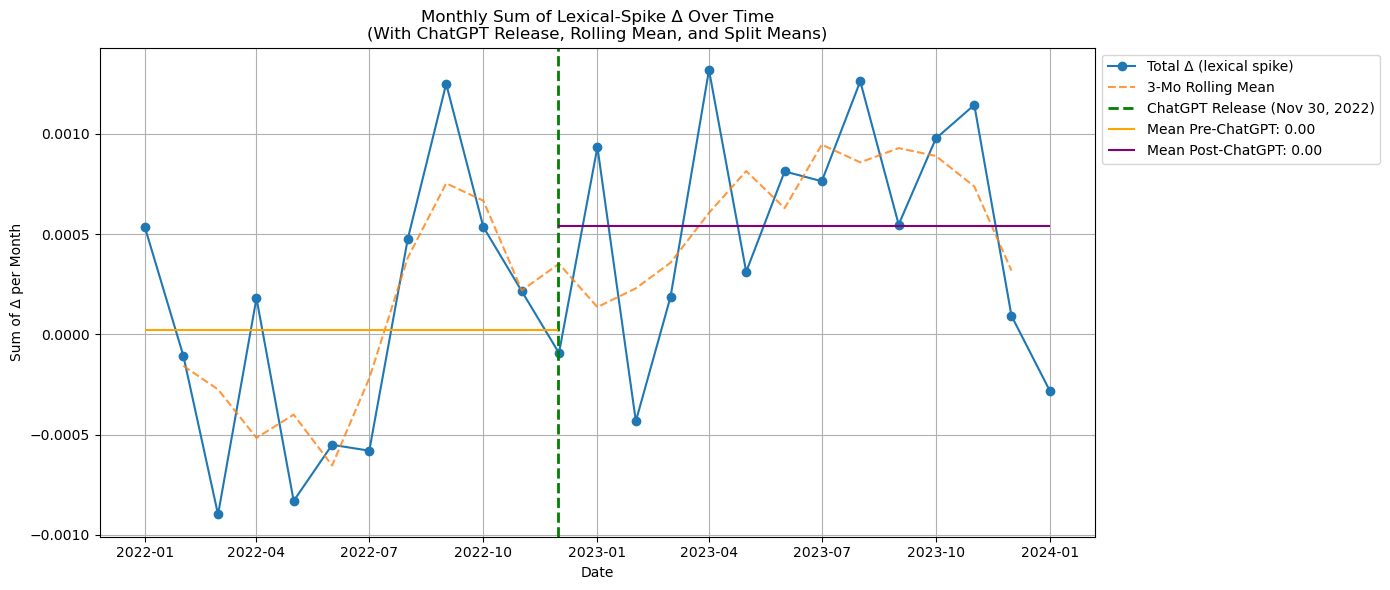

In [26]:
# 1. Read in your CSV
df = pd.read_csv(
    '../python_code/everything100percat.csv',
    parse_dates=['snapshot_ts'],
    date_parser=lambda s: pd.to_datetime(s).tz_convert(None)  # drop tz if present
)

# 2. Bucket into calendar-month Timestamps correctly
df['month'] = (
    df['snapshot_ts']
      .dt.tz_localize(None)           # drop any tz info
      .dt.to_period('M')              # convert to monthly period
      .dt.to_timestamp()              # back to Timestamp at period start
)

# 3. Aggregate your delta by month
monthly = (
    df.groupby('month')['lexical_spike_delta']
      .mean()
      .reset_index(name='total_delta')
)

# 4. Rolling mean and split means
monthly['rolling_mean'] = monthly['total_delta'].rolling(3, center=True).mean()
release      = pd.Timestamp('2022-11-30')
mean_pre     = monthly.loc[monthly['month'] <= release, 'total_delta'].mean()
mean_post    = monthly.loc[monthly['month']  > release, 'total_delta'].mean()

# 5. Plot with segmented horizontal lines
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(monthly['month'], monthly['total_delta'],
        marker='o', label='Total Δ (lexical spike)')
ax.plot(monthly['month'], monthly['rolling_mean'],
        linestyle='--', label='3-Mo Rolling Mean', alpha=0.8)
ax.axvline(release, color='green', linestyle='--', linewidth=2,
           label='ChatGPT Release (Nov 30, 2022)')

ax.hlines(mean_pre,
          xmin=monthly['month'].min(),
          xmax=release,
          colors='orange',
          linestyles='-',
          linewidth=1.5,
          label=f'Mean Pre-ChatGPT: {mean_pre:.2f}')
ax.hlines(mean_post,
          xmin=release,
          xmax=monthly['month'].max(),
          colors='purple',
          linestyles='-',
          linewidth=1.5,
          label=f'Mean Post-ChatGPT: {mean_post:.2f}')

ax.set_title('Monthly Sum of Lexical-Spike Δ Over Time\n'
             '(With ChatGPT Release, Rolling Mean, and Split Means)')
ax.set_xlabel('Date')
ax.set_ylabel('Sum of Δ per Month')
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.grid(True)
fig.tight_layout()
plt.show()


C:\Users\david\AppData\Local\Temp\ipykernel_30076\1480165217.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(


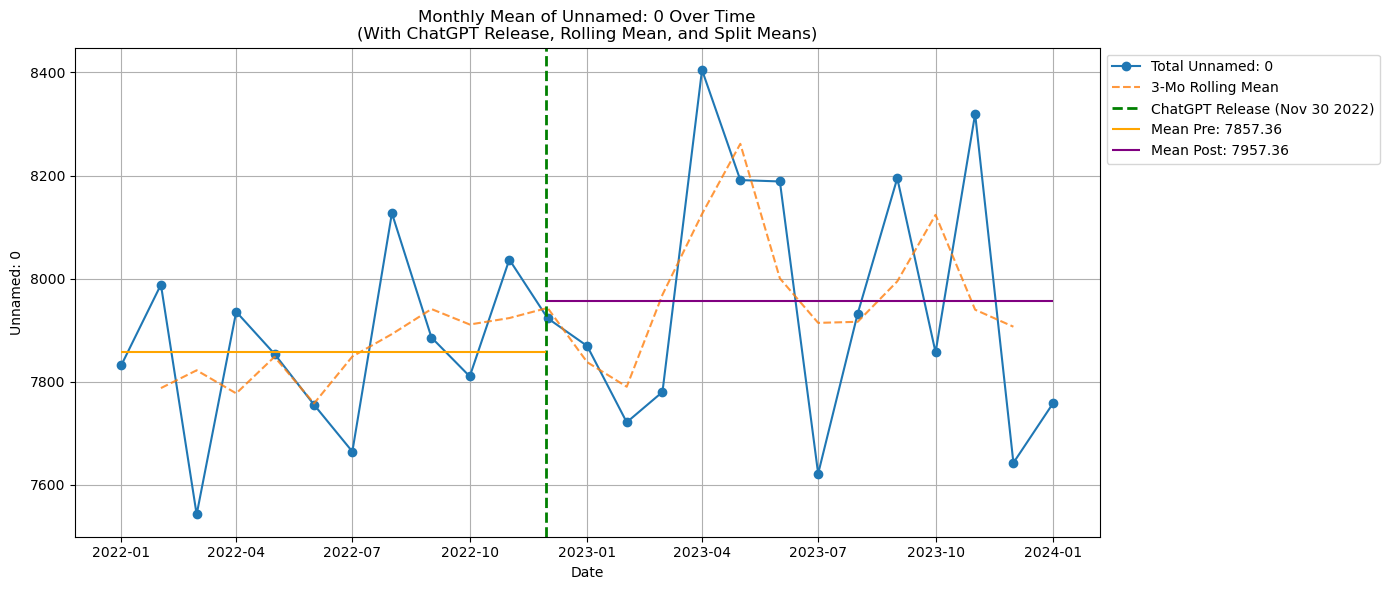

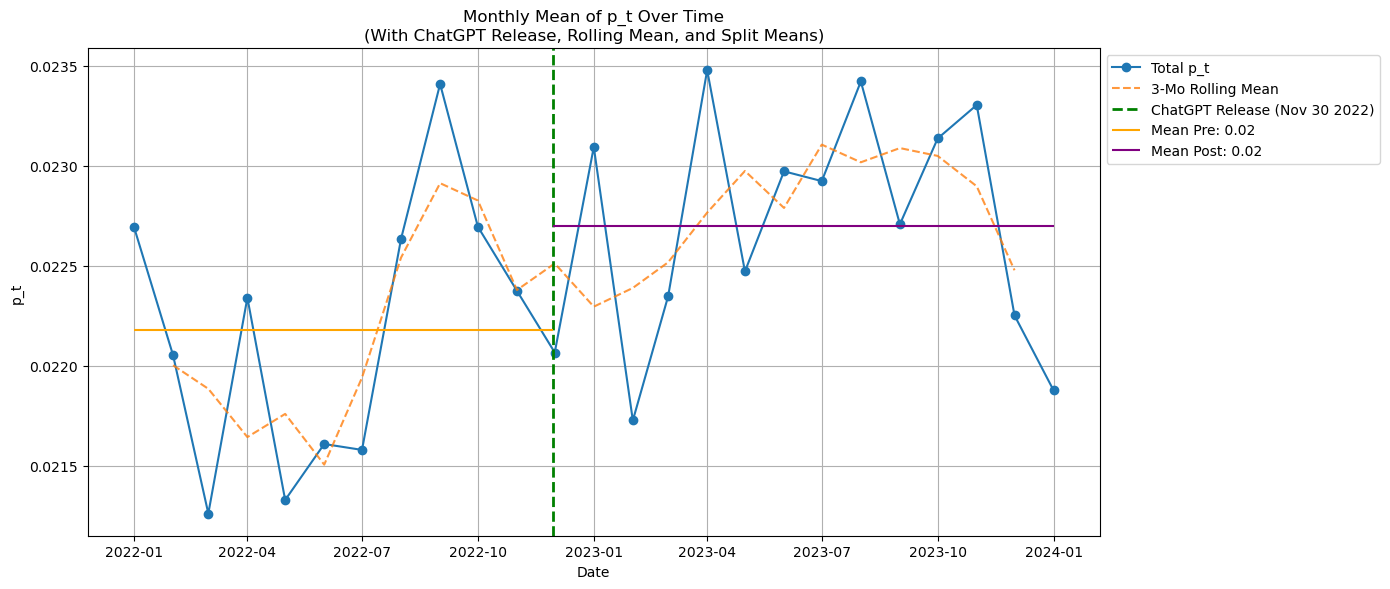

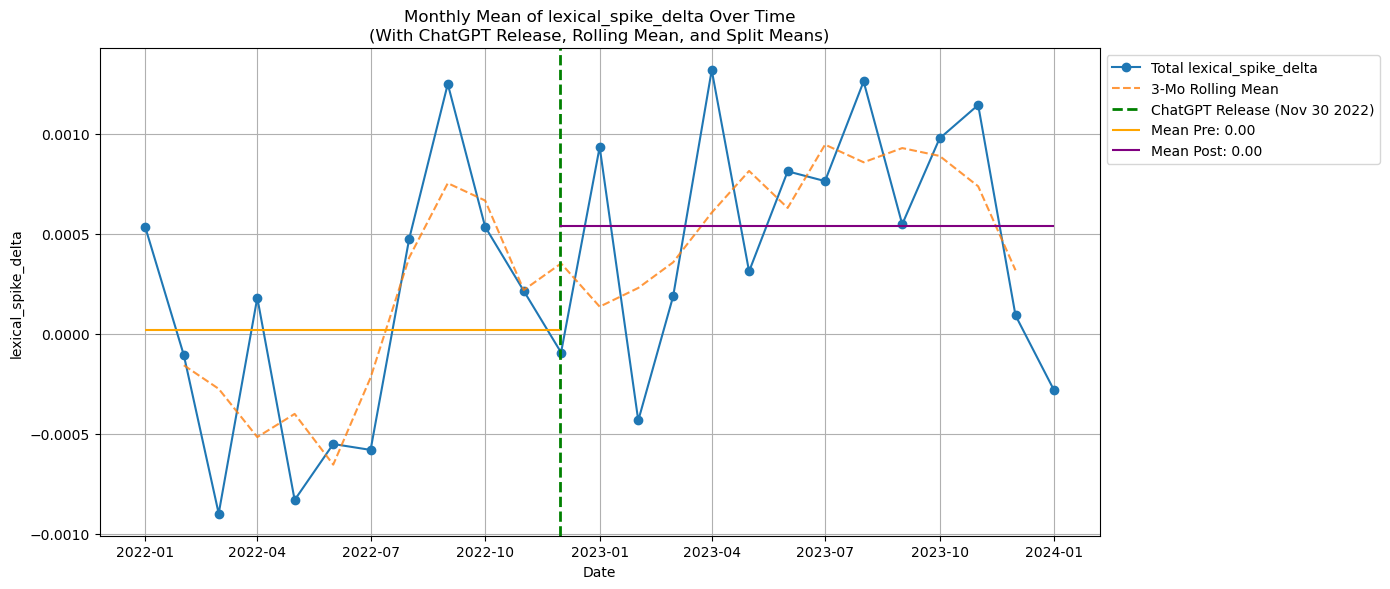

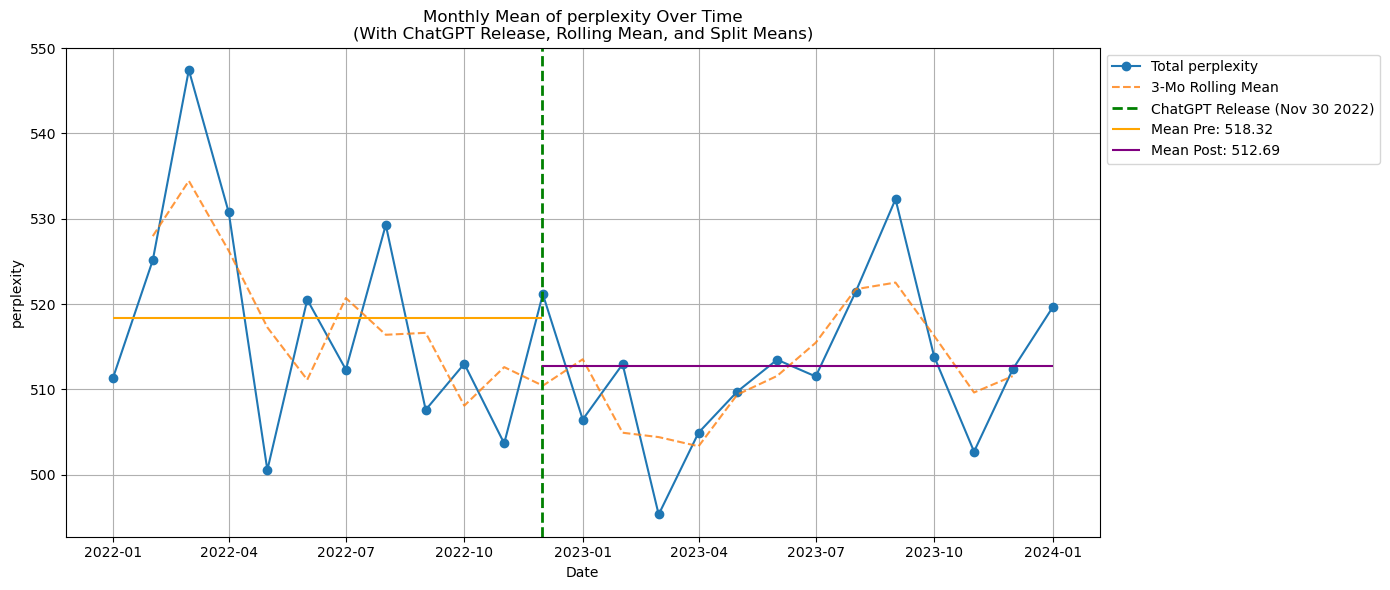

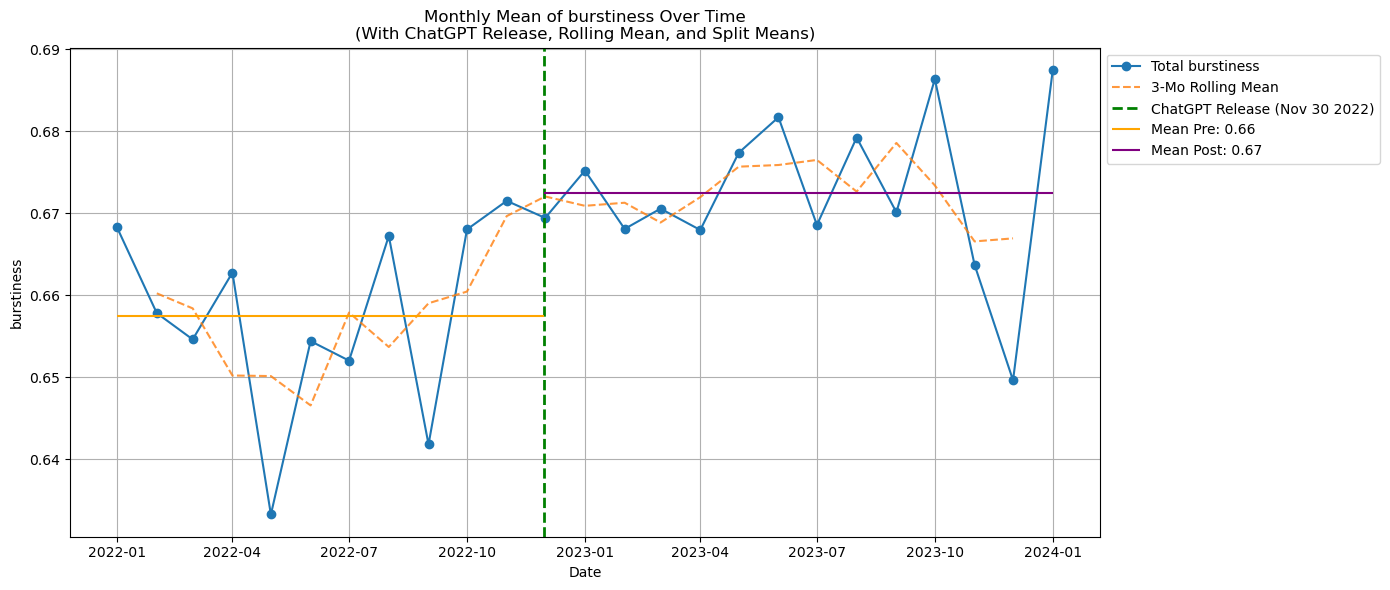

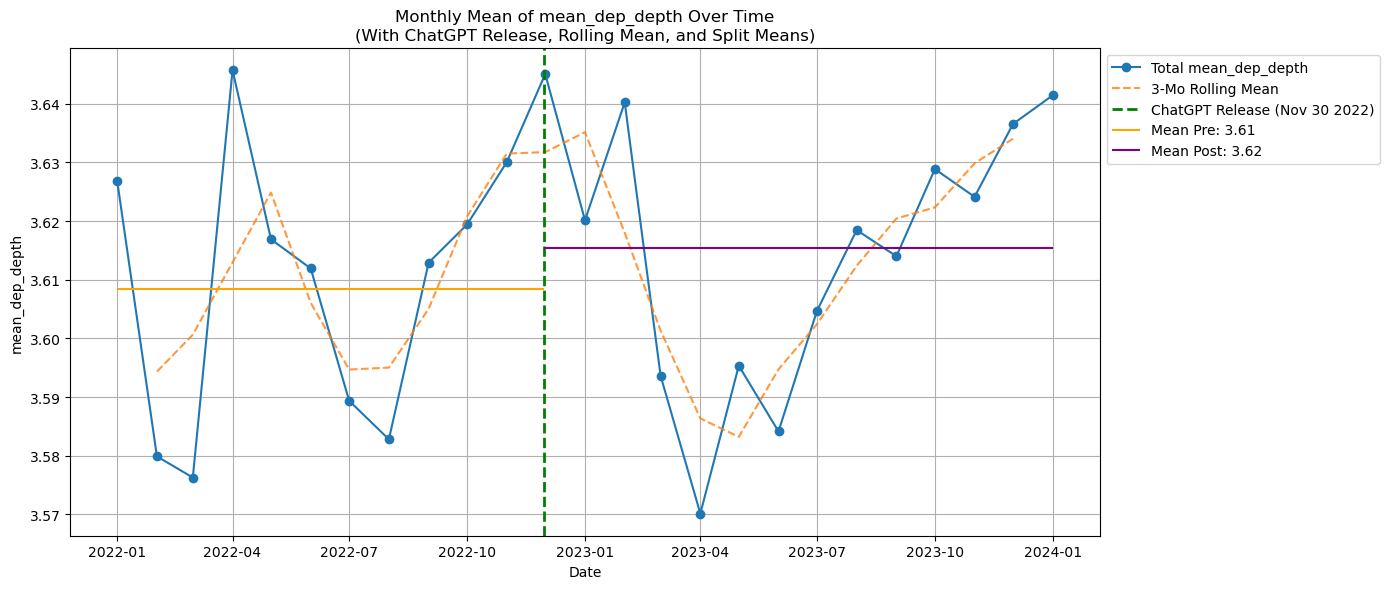

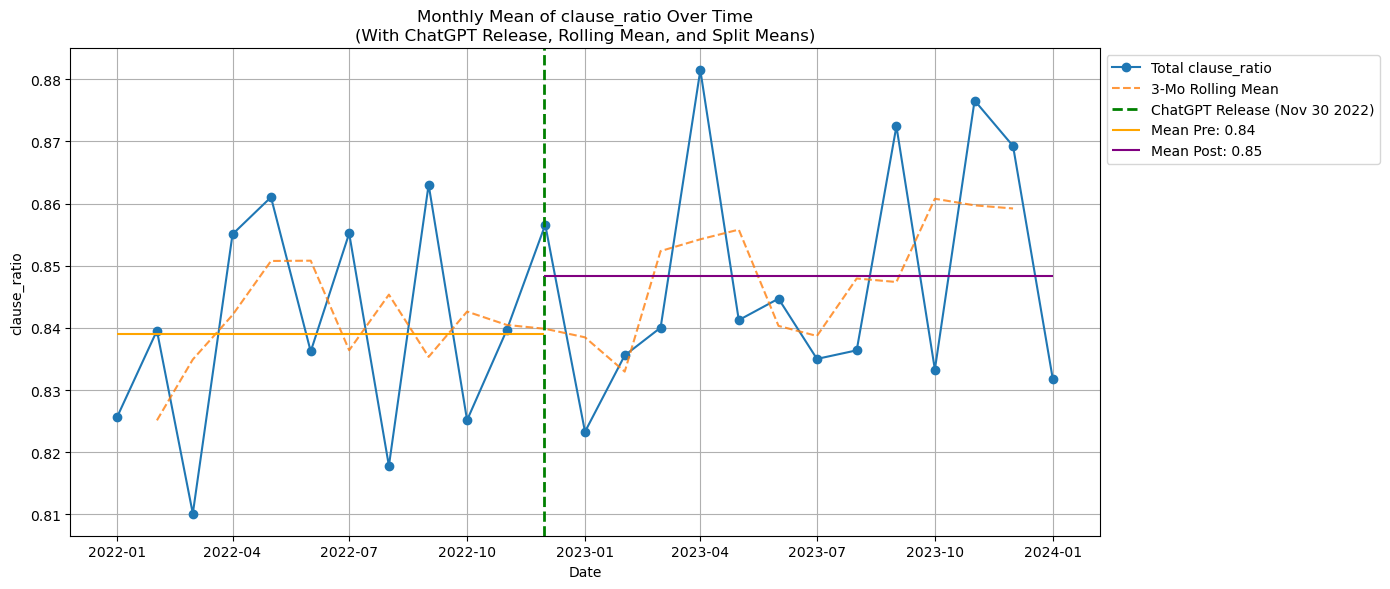

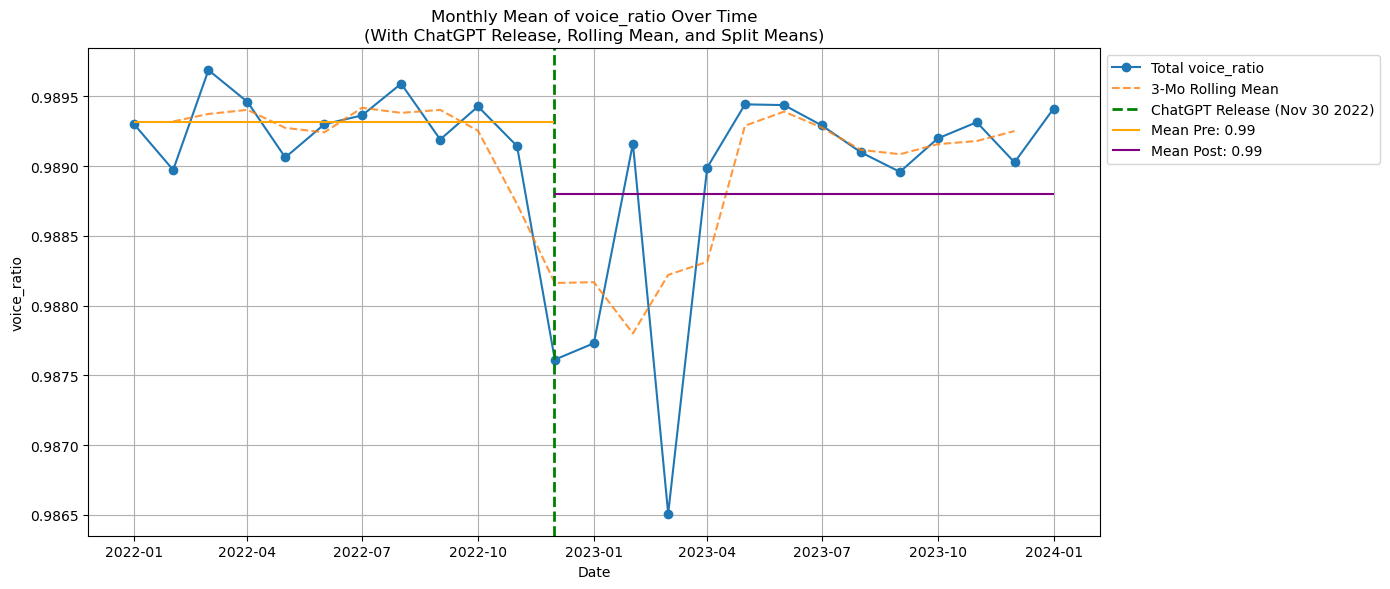

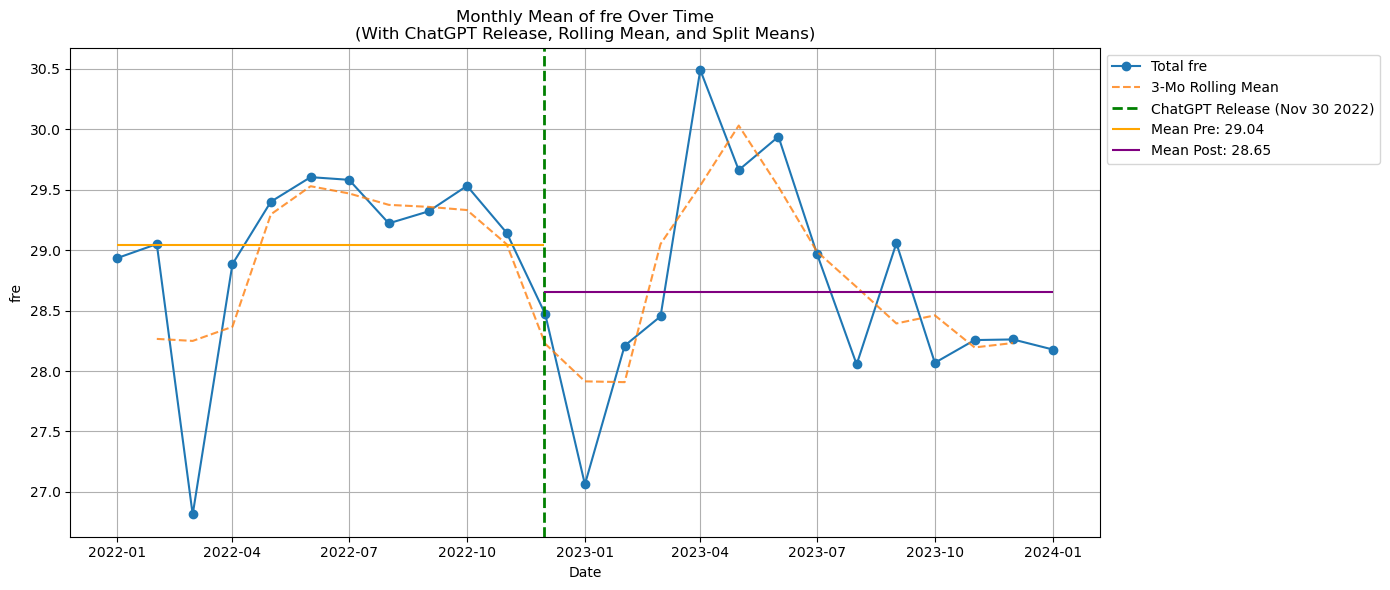

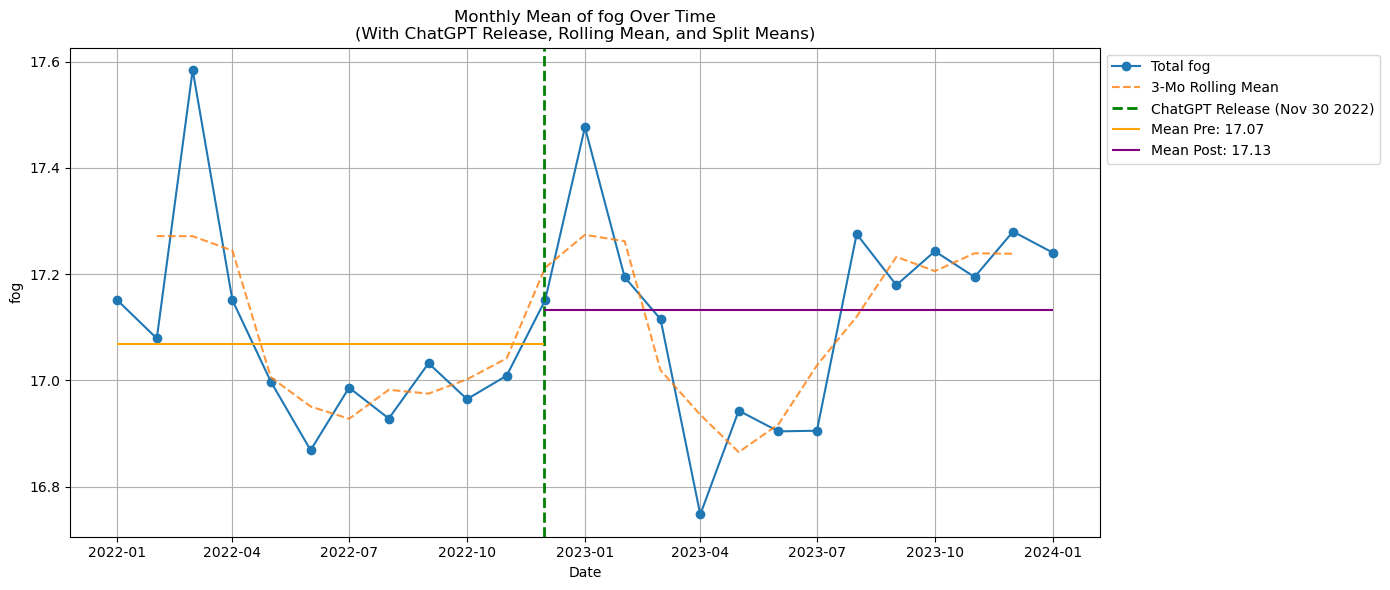

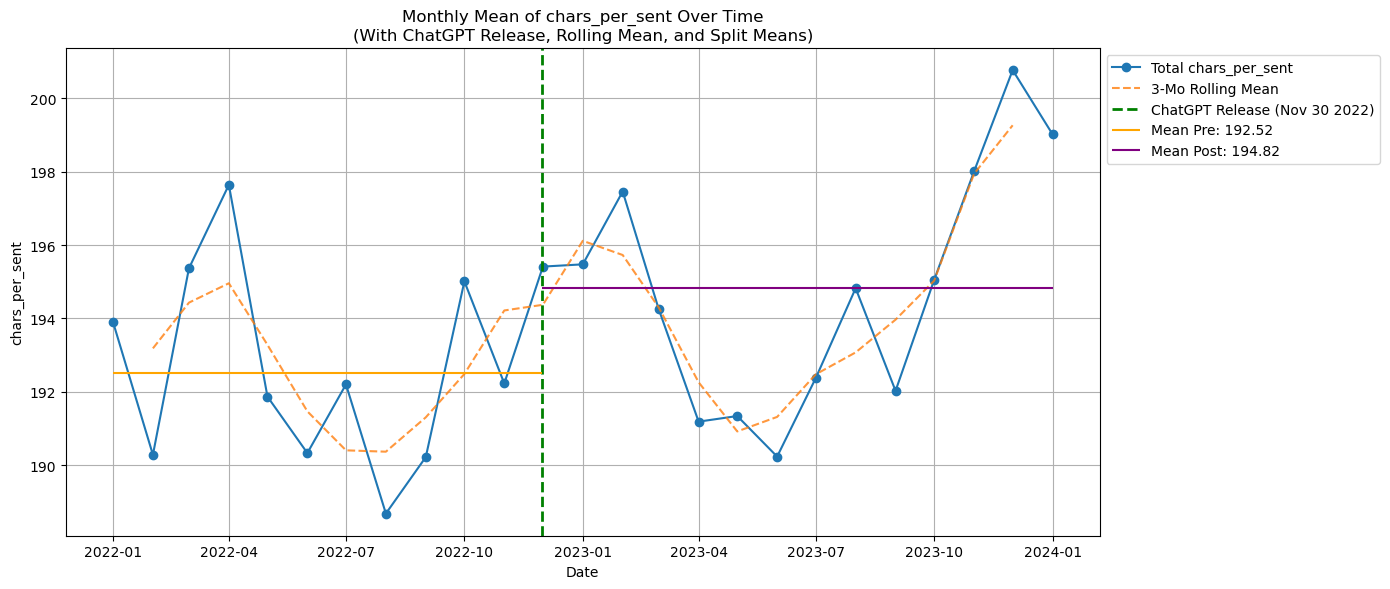

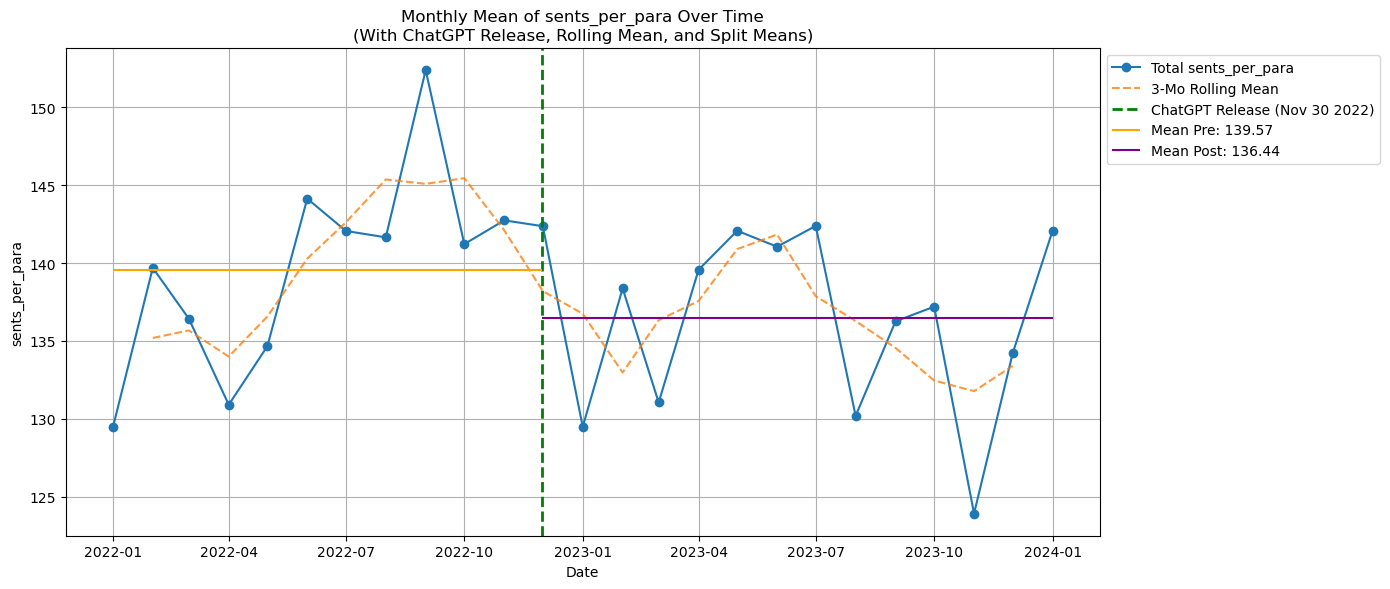

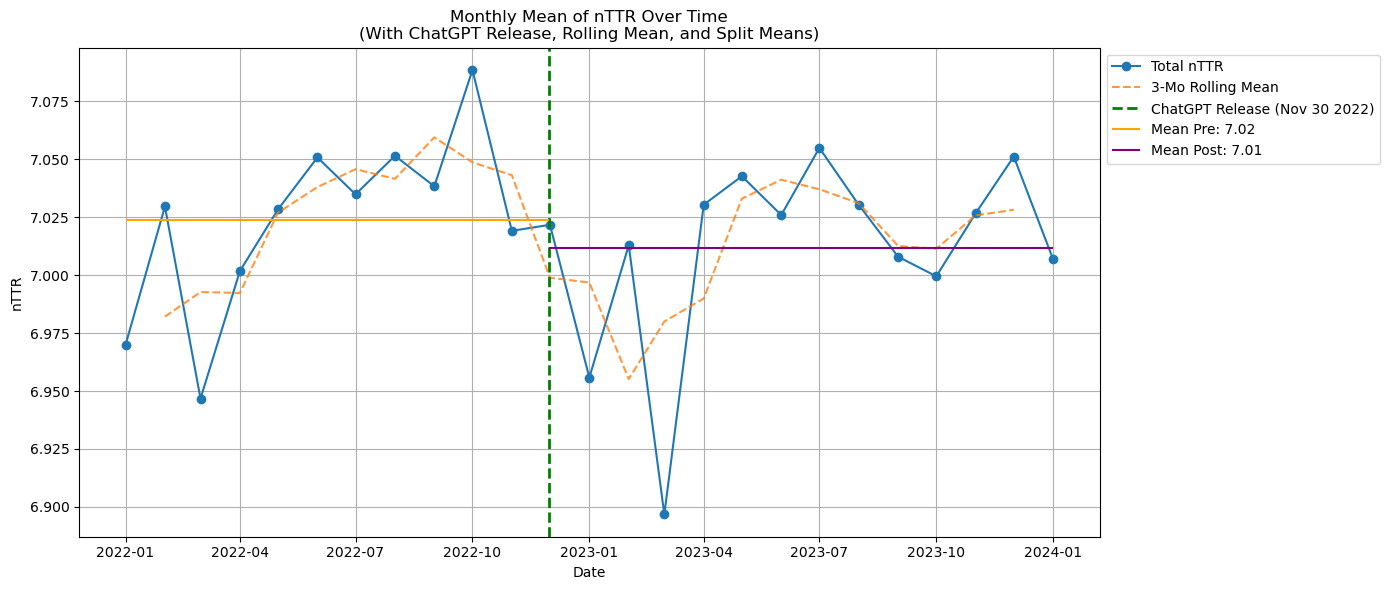

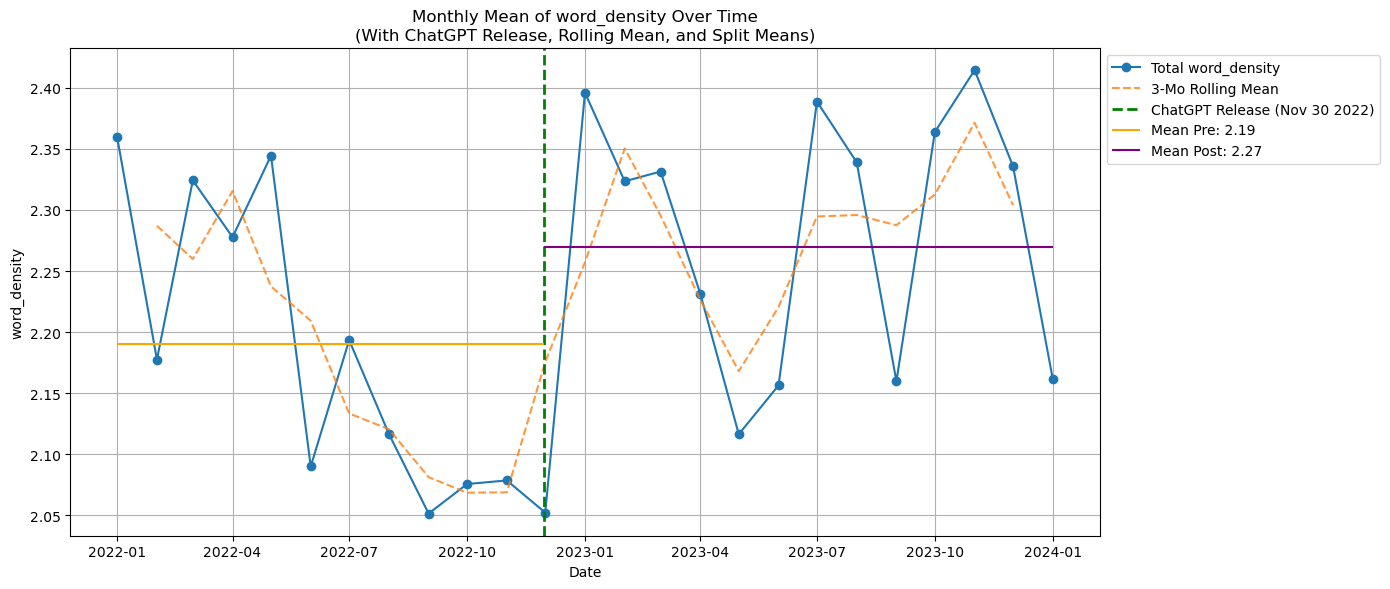

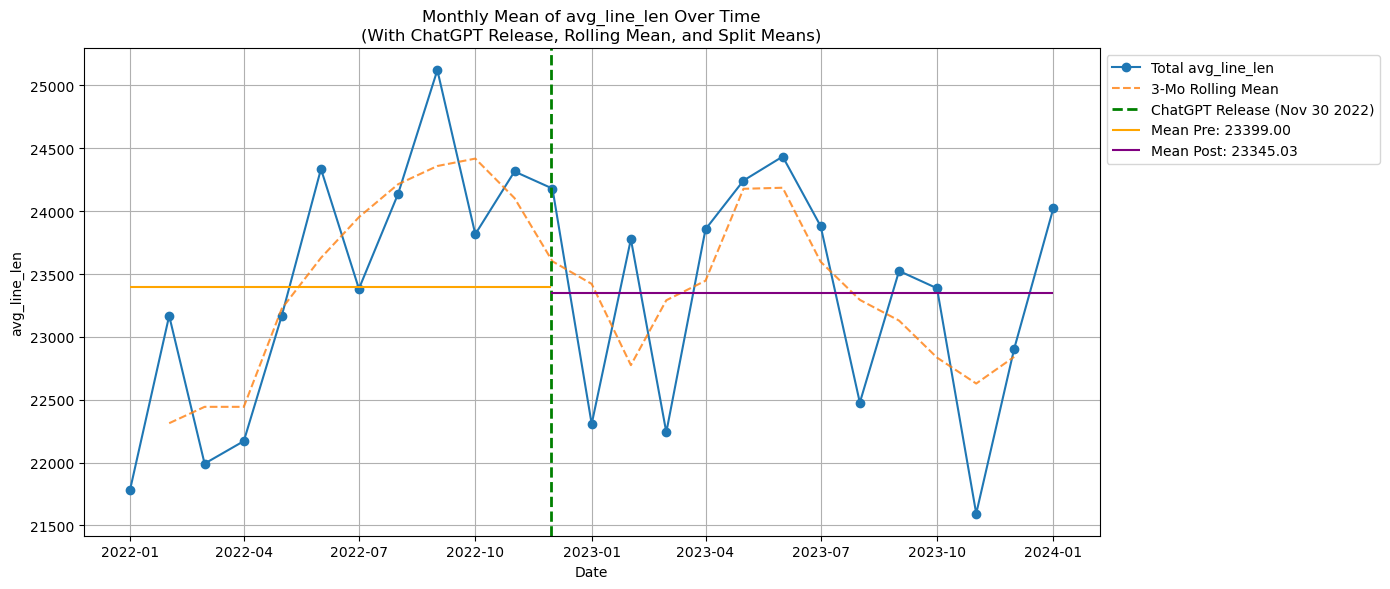

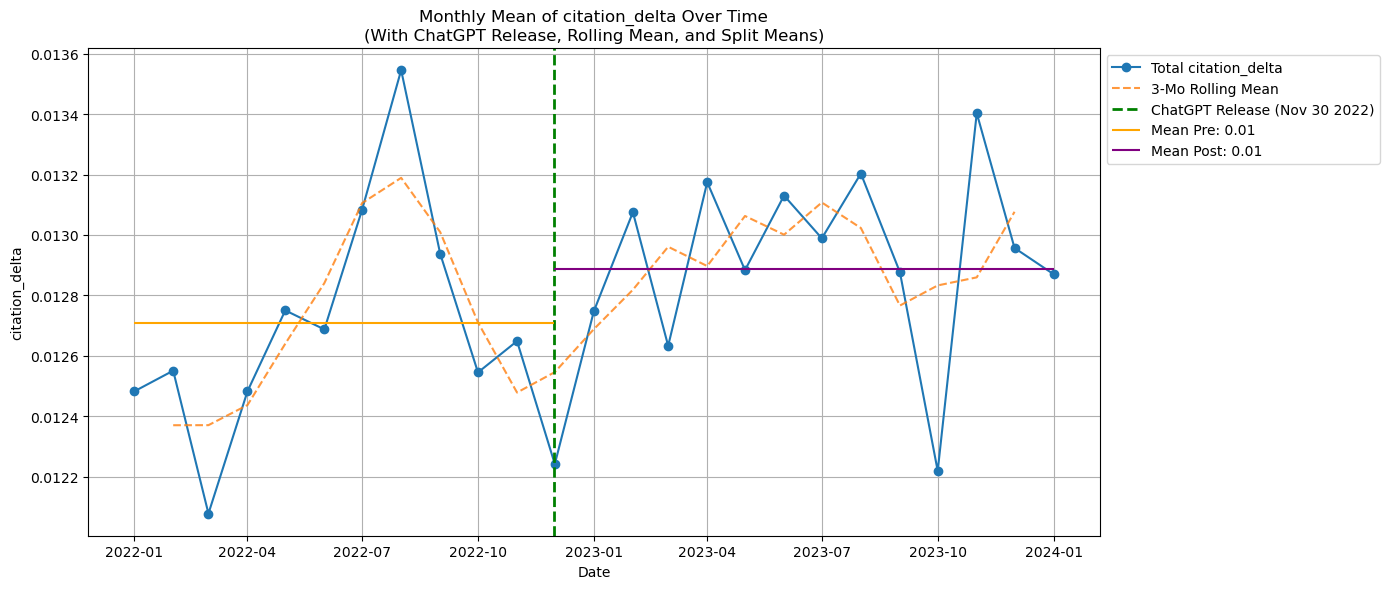

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    '../python_code/everything100percat.csv',
    parse_dates=['snapshot_ts'],
    date_parser=lambda s: pd.to_datetime(s).tz_convert(None)  # drop tz if present
)

# 2. Drop timezone if any, and bucket into month periods
df['snapshot_ts'] = df['snapshot_ts'].dt.tz_localize(None)
df['month']       = df['snapshot_ts'].dt.to_period('M').dt.to_timestamp()

# 3. Identify your feature columns by excluding metadata
meta_cols = [
    'snapshot_ts','month','rev_id','article_id',
    'user','is_bot','content','title','root','stratum','plain_text'
]
feature_cols = [c for c in df.columns
                if pd.api.types.is_numeric_dtype(df[c]) and c not in meta_cols]

# 4. ChatGPT release date
release = pd.Timestamp('2022-11-30')

# 5. Loop over features
for feat in feature_cols:
    # a) aggregate by month (sum; or .mean() if you prefer average)
    monthly = (
        df.groupby('month')[feat]
          .mean() # or .mean() if you want average per month
          .reset_index(name='value')
    )
    # b) rolling mean
    monthly['rolling'] = monthly['value'].rolling(window=3, center=True).mean()

    # c) pre/post means
    mean_pre  = monthly.loc[monthly['month'] <= release, 'value'].mean()
    mean_post = monthly.loc[monthly['month']  > release, 'value'].mean()

    # d) plot
    fig, ax = plt.subplots(figsize=(14,6))
    ax.plot(monthly['month'], monthly['value'],
            marker='o', label=f'Total {feat}')
    ax.plot(monthly['month'], monthly['rolling'],
            linestyle='--', label='3-Mo Rolling Mean', alpha=0.8)

    ax.axvline(release, color='green', linestyle='--', linewidth=2,
               label='ChatGPT Release (Nov 30 2022)')
    ax.hlines(mean_pre,
              xmin=monthly['month'].min(),
              xmax=release,
              colors='orange',
              linestyles='-',
              linewidth=1.5,
              label=f'Mean Pre: {mean_pre:.2f}')
    ax.hlines(mean_post,
              xmin=release,
              xmax=monthly['month'].max(),
              colors='purple',
              linestyles='-',
              linewidth=1.5,
              label=f'Mean Post: {mean_post:.2f}')

    ax.set_title(f'Monthly Mean of {feat} Over Time\n'
                 '(With ChatGPT Release, Rolling Mean, and Split Means)')
    ax.set_xlabel('Date')
    ax.set_ylabel(feat)
    ax.legend(loc='upper left', bbox_to_anchor=(1,1))
    ax.grid(True)
    fig.tight_layout()
    plt.show()
    # save plot with an appropriate title into a plots directory
    fig.savefig(f'../python_code/plots/{feat}_plot.png')
    plt.close()


C:\Users\david\AppData\Local\Temp\ipykernel_32624\3657701121.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(


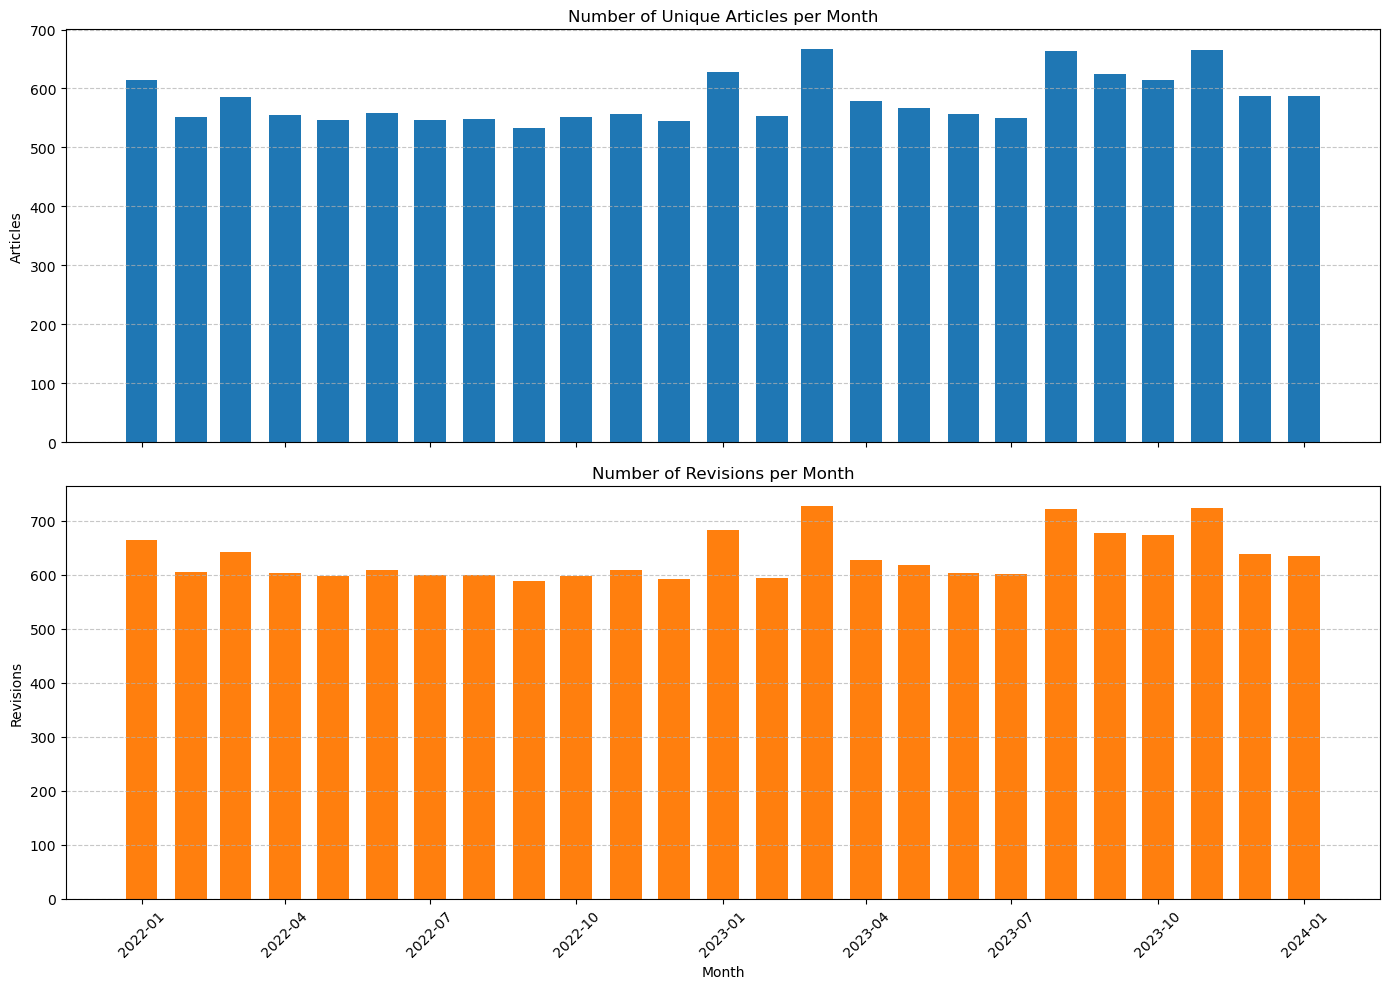

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(
    '../python_code/everything100percat.csv',
    parse_dates=['snapshot_ts'],
    date_parser=lambda s: pd.to_datetime(s).tz_convert(None)  # drop tz if present
)

# 2. Drop any timezone and bucket into months
df['snapshot_ts'] = df['snapshot_ts'].dt.tz_localize(None)
df['month']       = df['snapshot_ts'].dt.to_period('M').dt.to_timestamp()

# 3. Aggregate counts
articles_per_month = (
    df.groupby('month')['article_id']
      .nunique()
      .reset_index(name='num_articles')
)

revisions_per_month = (
    df.groupby('month')
      .size()
      .reset_index(name='num_revisions')
)

# 4. Plot side-by-side bar charts
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Unique articles per month
axes[0].bar(
    articles_per_month['month'],
    articles_per_month['num_articles'],
    width=20,
    color='C0'
)
axes[0].set_title('Number of Unique Articles per Month')
axes[0].set_ylabel('Articles')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Revisions per month
axes[1].bar(
    revisions_per_month['month'],
    revisions_per_month['num_revisions'],
    width=20,
    color='C1'
)
axes[1].set_title('Number of Revisions per Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Revisions')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Format x-axis dates
for ax in axes:
    ax.tick_params(axis='x', rotation=45)
    ax.xaxis_date()

plt.tight_layout()
plt.show()


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load your revision-level DataFrame
df = pd.read_csv(
    '../python_code/everything100percat.csv',
    parse_dates=['snapshot_ts']
)

# 2. Drop timezone if any and bucket into month periods
df['snapshot_ts'] = df['snapshot_ts'].dt.tz_localize(None)
df['month']       = df['snapshot_ts'].dt.to_period('M').dt.to_timestamp()

# 3. Identify feature columns by excluding metadata
meta_cols = [
    'snapshot_ts','month','rev_id','article_id',
    'user','is_bot','content','title','root','stratum','plain_text'
]
feature_cols = [
    c for c in df.columns
    if pd.api.types.is_numeric_dtype(df[c]) and c not in meta_cols
]

# 4. ChatGPT release date
release = pd.Timestamp('2022-11-30')

# 5. Prepare output directory
output_dir = '../python_code/plots/per_category'
os.makedirs(output_dir, exist_ok=True)

# 6. Fixed list of top-level strata
strata_list = ['History', 'Politics', 'Popular Culture', 'Science & Medicine', 'Technology']

# 7. Loop over strata and features
for strata in strata_list:
    df_strata = df[df['stratum'] == strata]
    for feat in feature_cols:
        # a) aggregate by month (mean per revision in this strata)
        monthly = (
            df_strata
            .groupby('month')[feat]
            .mean()
            .reset_index(name='value')
        )
        # b) rolling mean
        monthly['rolling'] = monthly['value'].rolling(window=3, center=True).mean()

        # c) compute pre/post means
        mean_pre  = monthly.loc[monthly['month'] <= release, 'value'].mean()
        mean_post = monthly.loc[monthly['month']  > release, 'value'].mean()

        # d) plot
        fig, ax = plt.subplots(figsize=(14,6))
        ax.plot(monthly['month'], monthly['value'],
                marker='o', label=f'Mean {feat}')
        ax.plot(monthly['month'], monthly['rolling'],
                linestyle='--', label='3-Mo Rolling Mean', alpha=0.8)

        ax.axvline(release, color='green', linestyle='--', linewidth=2,
                   label='ChatGPT Release (Nov 30 2022)')
        ax.hlines(mean_pre,
                  xmin=monthly['month'].min(),
                  xmax=release,
                  colors='orange',
                  linestyles='-',
                  linewidth=1.5,
                  label=f'Mean Pre: {mean_pre:.2f}')
        ax.hlines(mean_post,
                  xmin=release,
                  xmax=monthly['month'].max(),
                  colors='purple',
                  linestyles='-',
                  linewidth=1.5,
                  label=f'Mean Post: {mean_post:.2f}')

        ax.set_title(f'{strata}: Monthly Mean of {feat}\n'
                     '(ChatGPT Release, Rolling Mean, Split Means)')
        ax.set_xlabel('Date')
        ax.set_ylabel(feat)
        ax.legend(loc='upper left', bbox_to_anchor=(1,1))
        ax.grid(True)
        fig.tight_layout()

        # save plot
        safe_strata = strata.lower().replace(' & ', '_').replace(' ', '_')
        safe_feat   = feat.lower().replace(' ', '_')
        filename = f'{safe_strata}_{safe_feat}.png'
        fig.savefig(os.path.join(output_dir, filename))
        plt.close(fig)

print(f'Done! Plots saved under {output_dir}')


Done! Plots saved under ../python_code/plots/per_category
